## **Proyecto Naive Bayes - Luis Alpizar**
- **Source**: 4Geeks
- **URL**: https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv
- **Goal**: Crear un clasificador de reseñas de la tienda de Google Play

## Paso 0: Importar Librerias

In [52]:
# Importacion de Librerias
# Registros y serialización
import logging
import pickle

# Análisis de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
from sklearn.model_selection import (
    train_test_split,
    cross_validate,
    cross_val_predict,
    GridSearchCV,
    RandomizedSearchCV
)

# Preprocesamiento
from sklearn.preprocessing import (
    PowerTransformer,
    LabelEncoder,
    MinMaxScaler
)

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Pipelines
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

# Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer


# Métricas
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# Inspección
from sklearn.inspection import permutation_importance

# Configuración del registro
logger = logging.getLogger()
logger.setLevel(logging.ERROR)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Paso 1: Carga del dataset

In [3]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv'
df_raw = pd.read_csv(url)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   package_name  891 non-null    object
 1   review        891 non-null    object
 2   polarity      891 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.0+ KB


In [4]:
df_raw.sample(10, random_state=2025)

,package_name,review,polarity
622,com.uc.browser.en,good good for slow connection this uc minilit...,1
25,com.facebook.katana,can't install (error code: -505) have samsung...,0
307,com.tencent.mm,"bad new update, sight by swipe in chats gone ...",0
783,org.mozilla.firefox,"all you need, easy and gives you control open...",0
834,com.hamropatro,well done nicely designed .....this app had c...,1
109,com.linkedin.android,organization logo whenever i try to add my or...,0
339,com.viber.voip,issue in last online time it doesn't refresh ...,0
560,jabanaki.todo.todoly,"great, simple, recommend love this app. looki...",1
595,com.evernote,"neat idea, but let-down by no linux support. ...",0
509,com.Slack,free the gifs not reliable on a slower networ...,0


## Paso 2: Data preprocessing

In [19]:
df_baking = df_raw.copy()
df_baking = df_baking.drop("package_name", axis=1)
df_baking['polarity'] = df_baking['polarity'].apply(lambda x: 'positive' if x==1 else 'negative') # Convierte los valores 1 en Positive y el resto en Negativos
df_baking['polarity'] = df_baking['polarity'].astype('category')
stopwords.words('english')
df = df_baking.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   review    891 non-null    object  
 1   polarity  891 non-null    category
dtypes: category(1), object(1)
memory usage: 8.1+ KB


## Paso 3: Exploratory Data Analysis

In [6]:
df_train, df_test = train_test_split(
    df, test_size=0.2,
    stratify=df['polarity'],
    random_state=2025
)

In [20]:
df_train.describe(include='category').T

,count,unique,top,freq
polarity,712,2,negative,467


## Paso 4: Machine Learning

In [21]:
#Entrenamiento
X_train = df_train['review'].copy()
y_train = df_train['polarity'].copy()
#Prueba
X_test = df_test['review'].copy()
y_test = df_test['polarity'].copy()

In [27]:
 #Transforma las etiquetas en valores numéricos.
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

In [30]:
#Pipeline
clf_nb_p = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english')),
    ('nb', MultinomialNB())
])

In [31]:
clf_nb_p.fit(X_train,y_train_enc)

Pipeline(steps=[('vectorizer', CountVectorizer(stop_words='english')),
                ('nb', MultinomialNB())])

In [32]:
y_hat = clf_nb_p.predict(X_test)
print(f'accuracy: {accuracy_score(y_test_enc, y_hat):.2f}')
print(f'f1_score: {f1_score(y_test_enc, y_hat):.2f}')

accuracy: 0.82
f1_score: 0.69


              precision    recall  f1-score   support

    negative       0.81      0.95      0.87       117
    positive       0.86      0.58      0.69        62

    accuracy                           0.82       179
   macro avg       0.83      0.76      0.78       179
weighted avg       0.83      0.82      0.81       179



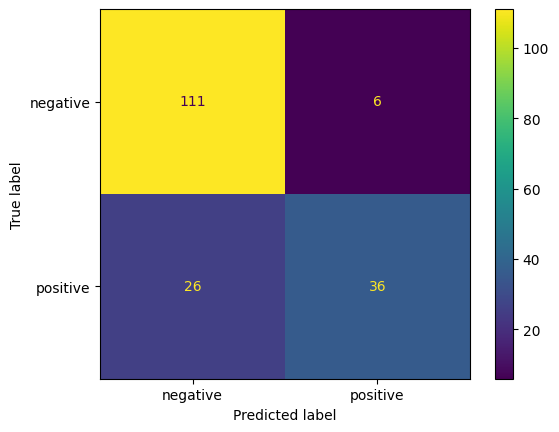

In [14]:
print(classification_report(y_test_enc, y_hat, target_names=label_encoder.classes_))
ConfusionMatrixDisplay.from_predictions(y_test_enc,y_hat,display_labels=label_encoder.classes_)
plt.show()

Negative:

- Precision (0.81): El modelo identifica correctamente el 81% de las instancias etiquetadas como negativas.
- Recall (0.95): El modelo captura el 95% de todas las instancias verdaderamente negativas.
- F1-Score (0.87): La combinación de precisión y recall muestra un buen equilibrio, indicando que el modelo es bastante efectivo en identificar instancias negativas.
- Support (117): Hay 117 instancias negativas en el conjunto de datos.

Positive:

- Precision (0.86): El modelo identifica correctamente el 86% de las instancias etiquetadas como positivas.
- Recall (0.58): El modelo captura solo el 58% de todas las instancias verdaderamente positivas, lo que indica que se le escapan varias instancias positivas.
- F1-Score (0.69): La combinación de precisión y recall muestra que el modelo tiene dificultades para identificar instancias positivas de manera consistente.
- Support (62): Hay 62 instancias positivas en el conjunto de datos.

El modelo tiene un rendimiento mucho mejor en la identificación de instancias negativas que en la identificación de instancias positivas.

## Paso 5: Ajuste del modelo

In [87]:
hyperparams = {
    "nb__alpha": np.linspace(0.01, 10.0, 200), # Genera 200 valores equidistantes entre 0.01 y 10.0.
    "nb__fit_prior": [True, False]             # Indica si se debe ajustar la probabilidad de las clases.
}
grid_search = GridSearchCV(estimator=clf_nb_p, param_grid=hyperparams, cv=5, scoring='accuracy')
grid_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer',
                                        CountVectorizer(stop_words='english')),
                                       ('nb',
                                        MultinomialNB(alpha=0.01,
                                                      fit_prior=False))]),
             param_grid={'nb__alpha': array([ 0.01      ,  0.06020101,  0.11040201,  0.16060302,  0.21080402,
        0.26100503,  0.31120603,  0.36140704,  0.41160804,  0.46180905,
        0.51201005,  0.56221106,  0.61241206,  0.66261307,  0.71281407,
        0.76301508,  0...
        8.54417085,  8.59437186,  8.64457286,  8.69477387,  8.74497487,
        8.79517588,  8.84537688,  8.89557789,  8.94577889,  8.9959799 ,
        9.0461809 ,  9.09638191,  9.14658291,  9.19678392,  9.24698492,
        9.29718593,  9.34738693,  9.39758794,  9.44778894,  9.49798995,
        9.54819095,  9.59839196,  9.64859296,  9.69879397,  9.74899497,
        9.79919598,  9.84939698,  9.89959799,  9.94979899, 10.        ]),
                         'nb__fit_prior': [True, False]},
             scoring='accuracy')

In [88]:
grid_search.fit(X_train, y_train_enc)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer',
                                        CountVectorizer(stop_words='english')),
                                       ('nb',
                                        MultinomialNB(alpha=0.01,
                                                      fit_prior=False))]),
             param_grid={'nb__alpha': array([ 0.01      ,  0.06020101,  0.11040201,  0.16060302,  0.21080402,
        0.26100503,  0.31120603,  0.36140704,  0.41160804,  0.46180905,
        0.51201005,  0.56221106,  0.61241206,  0.66261307,  0.71281407,
        0.76301508,  0...
        8.54417085,  8.59437186,  8.64457286,  8.69477387,  8.74497487,
        8.79517588,  8.84537688,  8.89557789,  8.94577889,  8.9959799 ,
        9.0461809 ,  9.09638191,  9.14658291,  9.19678392,  9.24698492,
        9.29718593,  9.34738693,  9.39758794,  9.44778894,  9.49798995,
        9.54819095,  9.59839196,  9.64859296,  9.69879397,  9.74899497,
        9.79919598,  9.84939698,  9.89959799,  9.94979899, 10.        ]),
                         'nb__fit_prior': [True, False]},
             scoring='accuracy')

In [58]:
# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'nb__alpha': 0.01, 'nb__fit_prior': False}


In [74]:
#Pipeline
clf_nb_adjusted = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english')),
    ('nb', MultinomialNB(alpha = 0.01, fit_prior = False))
])

In [84]:
y_hat_adjusted = clf_nb_adjusted.predict(X_test)
print(f'accuracy: {accuracy_score(y_test_enc, y_hat_adjusted):.2f}')

accuracy: 0.81


## Paso 6: Guardar modelo entrenado

In [81]:
with open("clf_nb_model.pkl", "wb") as naive_bayes:
    pickle.dump(clf_nb_p, naive_bayes)